<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Support_Vector_Machines_Exercises/blob/main/soft_margin_svm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question:**

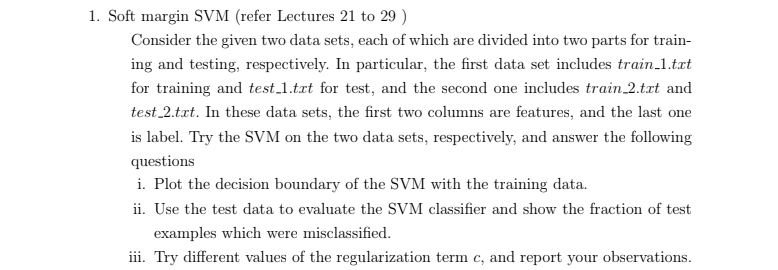

#**Answer:1(a)**

##**Data Analysis**

###***Read Training Set***

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
# read training set 1 and convert into pandas dataframe
df = pd.read_csv('train_1.txt', delim_whitespace=' ', header=None)

# display the data
print(df)

               0           1  2
0      97.855421  125.387990  1
1      48.571973  104.501180  1
2      80.250214  106.601290  1
3     114.659380   76.893242 -1
4      80.156290   92.579178  1
...          ...         ... ..
1495  117.951330   86.896305 -1
1496  105.958030   84.619172 -1
1497  114.405700   89.404364 -1
1498  131.177750   93.976537 -1
1499   81.351097  109.757670  1

[1500 rows x 3 columns]


###***Basic Details***

In [ ]:
# rows and columns
print(df.shape)

(1500, 3)


* Number of **Rows = 1500**
* Number of **Columns = 3**
* Number of **Features = 2**

In [ ]:
# basic statistical details
print(df.describe())

                 0            1            2
count  1500.000000  1500.000000  1500.000000
mean    106.465996   106.242949    -0.002667
std      22.066211    22.866386     1.000330
min      34.842996    41.714147    -1.000000
25%      89.966790    88.232062    -1.000000
50%     105.906490   106.926880    -1.000000
75%     122.833850   124.237392     1.000000
max     164.854810   166.573120     1.000000


* Both features have almost same set of minimum and maximum values.

###***Check for Null Values***

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB
None


* **No null value** is present in the dataset

###***Features Distribution***

Text(0.5, 0, 'X2')

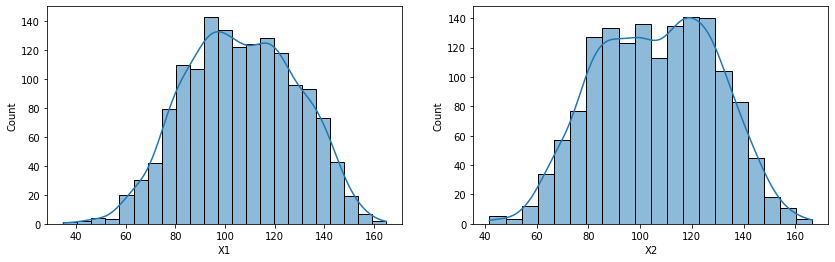

In [ ]:
plt.figure(figsize=(14,4))
# plot the histogram of 1st feature data
plt.subplot(121)
sns.histplot(data=df, x=0, kde=True)
plt.xlabel('X1')
# plot the histogram of 2nd feature data
plt.subplot(122)
sns.histplot(data=df, x=1, kde=True)
plt.xlabel('X2')

* Both feature values are almost normally distributed. Since both of them have almost same range too, we do not need to feature scale these.

##**Data Visualization**

Text(0, 0.5, 'X2')

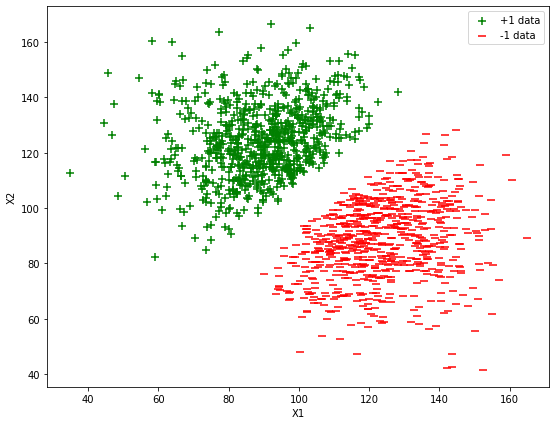

In [ ]:
# scatter plot
# output +1 => green and '+'
# output -1 => red and '-'
plt.figure(figsize=(9,7))
df1 = df.loc[df[2]==1]
df2 = df.loc[df[2]==-1]
plt.scatter(df1[0], df1[1], color='green', marker='+', s=60)
plt.scatter(df2[0], df2[1], color='red', marker='_', s=60)
plt.legend(['+1 data','-1 data'])
plt.xlabel('X1')
plt.ylabel('X2')

##**Test Data**

###***Read Test Data***

In [ ]:
# read test dataset 1 and convert into pandas dataframe
test_df = pd.read_csv('test_1.txt', delim_whitespace=' ', header=None)

# size of the dataset
print(test_df.shape)

# display the data
print(test_df)

(500, 3)
              0           1  2
0    133.437860  103.810470 -1
1    121.698080  104.574480 -1
2    125.708830   73.536465 -1
3     84.161628  131.217610  1
4    131.302240   96.246931 -1
..          ...         ... ..
495   89.577738  111.197790  1
496  113.859610   88.504409 -1
497  145.776400   85.472669 -1
498  118.437890   72.945254 -1
499  138.236350   82.789068 -1

[500 rows x 3 columns]


* There are **500** instances in the test data

##**SVM Implementation**

###**Function to Plot**

In [ ]:
# this function will provide the scatter plots

def plot_fun(model, df, color1, color2, flag):

  # separating +1 and -1 data
  df1 = df.loc[df[2]==1]
  df2 = df.loc[df[2]==-1]
  plt.scatter(df1[0], df1[1], color=color1, marker='+', s=60)
  plt.scatter(df2[0], df2[1], color=color2, marker='_', s=60)
  plt.legend(['+1 data','-1 data'])
  plt.xlabel('X1')
  plt.ylabel('X2')

  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  XX, YY = np.meshgrid(xx, yy)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  # training set
  if flag==1:
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')
  
  # test set
  elif flag==0:
    ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5,
              linestyles='-')

###**Function to Find Error**

In [ ]:
# This function will provide the error

def err_fun(model, df):

  # prediction with the learned model
  predicted_labels = model.predict(df.iloc[:,:-1])
  error_count = 0

  # comparison with actual label
  for i in range(df.shape[0]):
    if predicted_labels[i] != df.iloc[i,-1]:
      error_count = error_count + 1

  # returns the error percentage
  return (error_count * 100 / df.shape[0])

###**Function to Train SVM**

In [ ]:
# This function will train the SVM and do all other needed operations
def svm_fun(df, test_df, c):

  # training
  model = svm.SVC(kernel='linear', C = c)
  model.fit(df.iloc[:,:-1], df.iloc[:,-1])

  plt.figure(figsize=(15,6))

  # plot with training data
  plt.subplot(121)
  plt.title('Training Data, C = %s'%(c))
  plot_fun(model, df, 'green', 'red', 1)

  # plot with test data
  plt.subplot(122)
  plt.title('Test Data, C = %s'%(c))
  plot_fun(model, test_df, 'blue', 'magenta', 0)

  # support vector details
  print(f"{30*'==='}\n")
  print(f"Softmargin SVM with C = {c}\n")
  print(f"There are {len(model.support_vectors_)} support vectors in total.")
  print(f"\nThey are as follows:\n")
  for i in range(len(model.support_vectors_)):
    print(f"{i+1}. {model.support_vectors_[i]}\tLamda = \
    {model.dual_coef_[0][i]/(df.iloc[model.support_[i],-1])}")

  # error calculation
  print(f"\nTraining Error = {err_fun(model, df)} %")
  print(f"Testing Error = {err_fun(model, test_df)} %\n")

###**SVM with C = 1000**


Softmargin SVM with C = 1000

There are 3 support vectors in total.

They are as follows:

1. [112.80003 105.265  ]	Lamda =     0.015821984496977397
2. [111.43546 119.68417]	Lamda =     0.009925547121323777
3. [ 93.95697 102.51568]	Lamda =     0.005896437375653618

Training Error = 0.0 %
Testing Error = 0.0 %



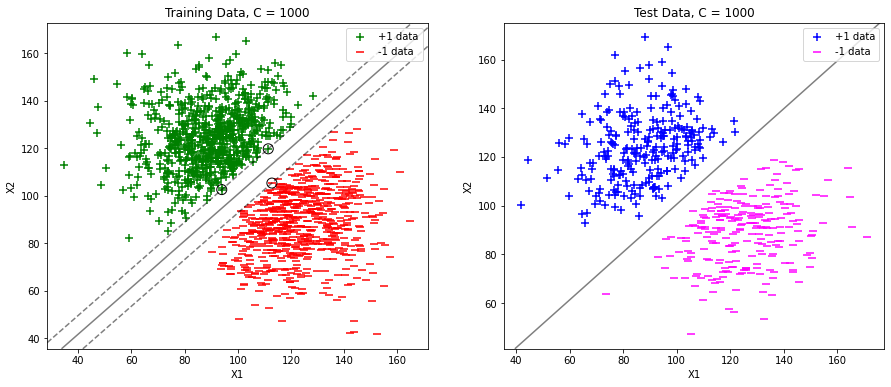

In [ ]:
svm_fun(df, test_df, 1000)

###**SVM with C = 100**


Softmargin SVM with C = 100

There are 3 support vectors in total.

They are as follows:

1. [112.80003 105.265  ]	Lamda =     0.015821984496977397
2. [111.43546 119.68417]	Lamda =     0.009925547121323777
3. [ 93.95697 102.51568]	Lamda =     0.005896437375653618

Training Error = 0.0 %
Testing Error = 0.0 %



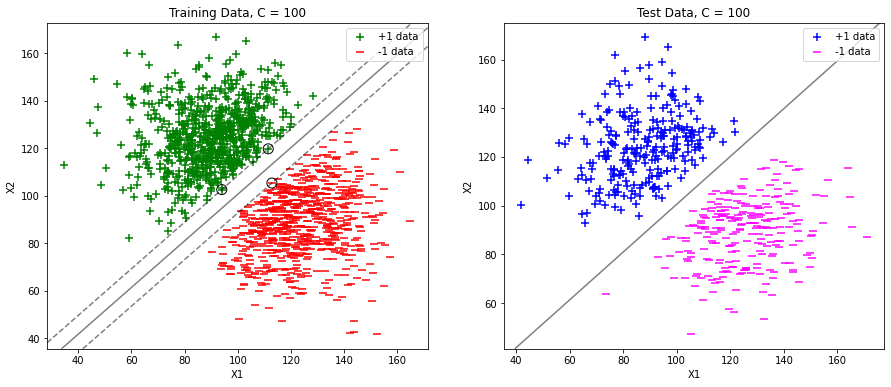

In [ ]:
svm_fun(df, test_df, 100)

###**SVM with C = 1**


Softmargin SVM with C = 1

There are 3 support vectors in total.

They are as follows:

1. [112.80003 105.265  ]	Lamda =     0.015821984496977397
2. [111.43546 119.68417]	Lamda =     0.009925547121323777
3. [ 93.95697 102.51568]	Lamda =     0.005896437375653618

Training Error = 0.0 %
Testing Error = 0.0 %



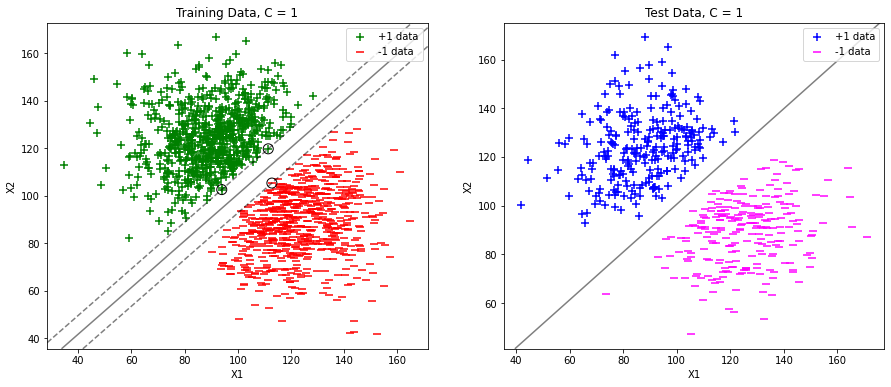

In [ ]:
svm_fun(df, test_df, 1)

###**SVM with C = 0.01**


Softmargin SVM with C = 0.01

There are 4 support vectors in total.

They are as follows:

1. [112.80003 105.265  ]	Lamda =     0.01
2. [101.3521    93.580409]	Lamda =     0.005246330720062449
3. [111.43546 119.68417]	Lamda =     0.006062533974598346
4. [ 93.95697 102.51568]	Lamda =     0.009183796745464103

Training Error = 0.0 %
Testing Error = 0.0 %



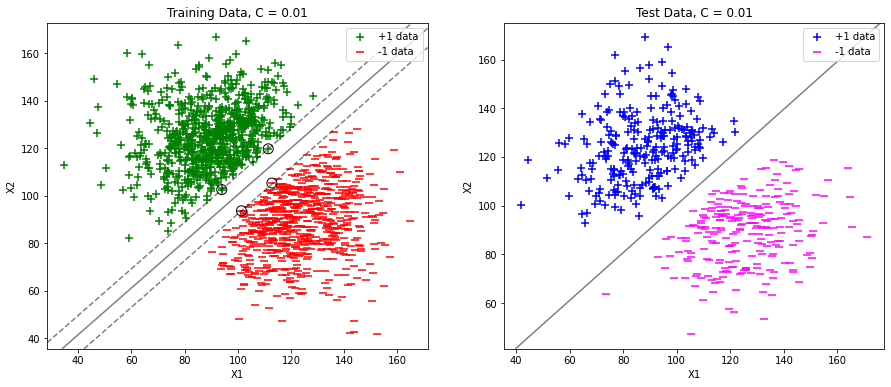

In [ ]:
svm_fun(df, test_df, 0.01)

###**SVM with C = 0.001**


Softmargin SVM with C = 0.001

There are 24 support vectors in total.

They are as follows:

1. [112.80003 105.265  ]	Lamda =     0.001
2. [102.16567   92.450221]	Lamda =     0.001
3. [102.35211   92.429084]	Lamda =     3.0098280505305624e-05
4. [111.1763  101.83797]	Lamda =     0.001
5. [105.04054   96.025027]	Lamda =     0.001
6. [115.19239 106.84811]	Lamda =     0.001
7. [101.3521    93.580409]	Lamda =     0.001
8. [125.93705 117.0811 ]	Lamda =     0.001
9. [103.68602   95.356161]	Lamda =     0.001
10. [102.29536   93.615224]	Lamda =     0.001
11. [119.63533 111.34973]	Lamda =     0.001
12. [136.27889 126.77449]	Lamda =     0.000985822920797448
13. [ 94.100748 103.19368 ]	Lamda =     0.001
14. [ 98.363769 108.63757 ]	Lamda =     0.001
15. [107.30023 116.33756]	Lamda =     0.001
16. [115.87817 125.05415]	Lamda =     0.001
17. [80.569068 90.484681]	Lamda =     0.001
18. [119.95112 130.32558]	Lamda =     0.001
19. [111.43546 119.68417]	Lamda =     0.001
20. [ 93.95697 102.51568]	Lamda

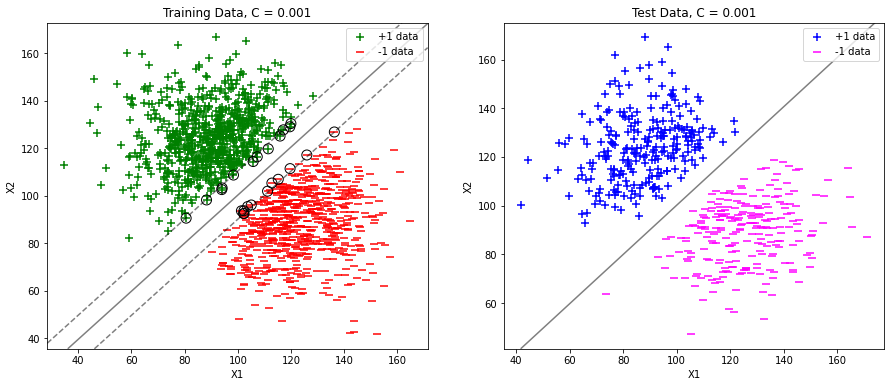

In [ ]:
svm_fun(df, test_df, 0.001)

##**Conclusion**

* The given dataset has been analyzed and the values of the features were found to be **almost normally distributed**.
* **No null values** were present in the training data and there were **1500 instances and 2 features**. The test data has **500** instances.
* The data set was corresponding to **binary classification** with labels -1 and +1.
* The training data has been visualized with the help of **scatter plot** and found to be well suitable for linear SVM.
* The softmargin SVM was implemented with linear kernel.
* Different values for the **hyper parameter C** has been experimented and the results were noted.
* In this particular experiment, there was no difference observed when experimented with C = 1000, 100 and 1. In these cases, there were three support vectors.
* Althogh, **when C has been decreased** to 0.01 and further to 0.001, **more number of support vectors** were found (4 and 24 respectively. This happened because the objective function of the SVM tried to concentrate on increasing the margin and provided less priority to the misclassifications or deviations.
* The **dual coefficient $\lambda$ values** were also studied by displaying them and found to be greater than 0 for all the support vectors and especiallly equal to C for those do not lie on the decision boundaries.
* In all experimented cases, both training error and test error were found to be **zero**.

##**Submitted By:**

####Ahammed Shaneeb N K

####M1, AI: Roll No - 2